In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('train.csv') # Advance Rgression Housing Dataset.

In [7]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
688,689,20,RL,60.0,8089,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,392000
863,864,20,RL,70.0,7931,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2009,WD,Normal,132500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
174,175,20,RL,47.0,12416,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,184000
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [8]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [9]:
df.sample(5)

,FireplaceQu,GarageQual,SalePrice
1018,TA,TA,160000
1028,Gd,TA,105000
1433,TA,TA,186500
107,NaN,TA,115000
695,TA,TA,176000


In [10]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of Houses')

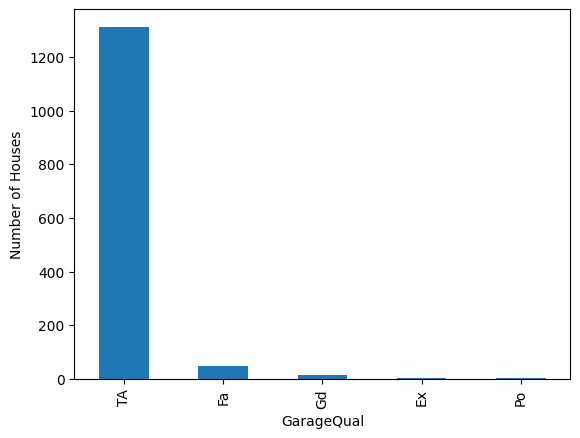

In [11]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of Houses')

In [12]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

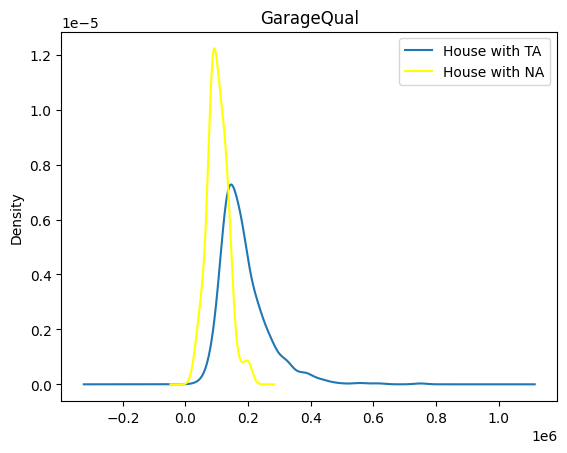

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax, color='yellow')

lines,labels = ax.get_legend_handles_labels()
labels = ['House with TA', 'House with NA']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')
plt.show()

In [15]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [17]:
df['GarageQual'].fillna('TA',inplace=True)

<Axes: xlabel='GarageQual'>

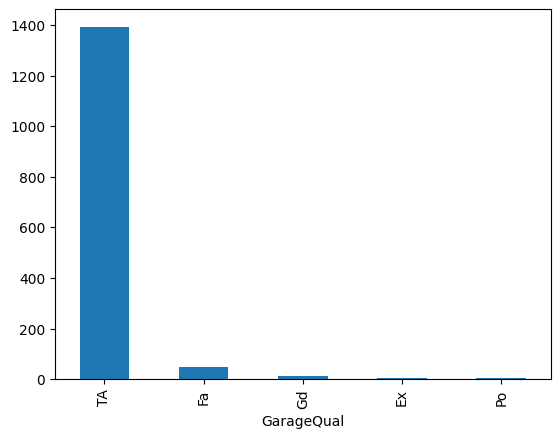

In [18]:
df['GarageQual'].value_counts().plot(kind='bar')

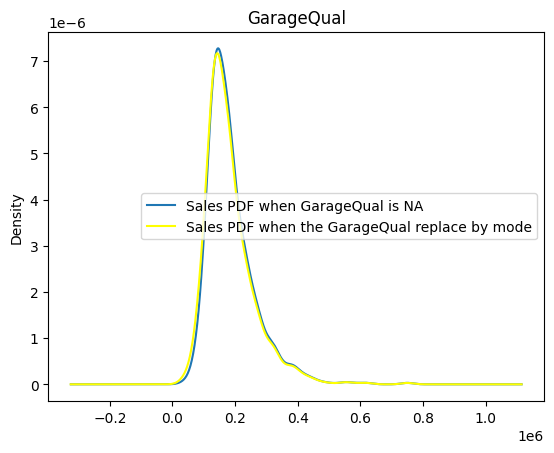

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

# dsitributattion after imputation

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax, color='yellow')

lines,labels = ax.get_legend_handles_labels()
labels = ['Sales PDF when GarageQual is NA', 'Sales PDF when the GarageQual replace by mode']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')
plt.show()

## Note:
      1. Since there was very less NA value for GarageQual which made mode imputation to have same distribution afterward.

<Axes: xlabel='FireplaceQu'>

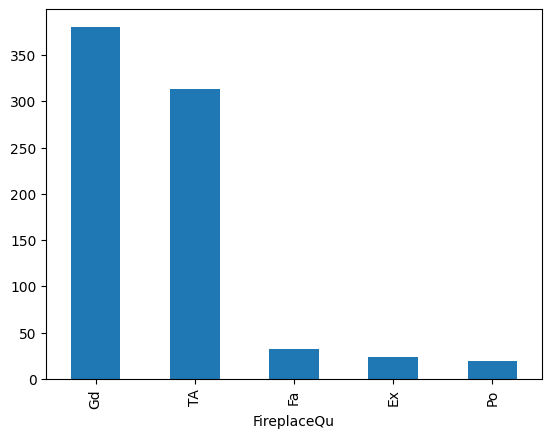

In [25]:
df['FireplaceQu'].value_counts().plot(kind='bar') 
# not one category is dominating hence mode will not be good idea for this attribute.

In [26]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

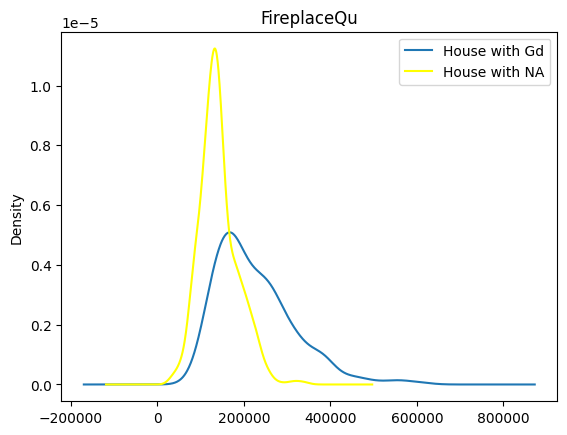

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax, color='yellow')

lines,labels = ax.get_legend_handles_labels()
labels = ['House with Gd', 'House with NA']
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')
plt.show()

In [29]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [31]:
df['FireplaceQu'].fillna('Gd',inplace=True)

<Axes: xlabel='FireplaceQu'>

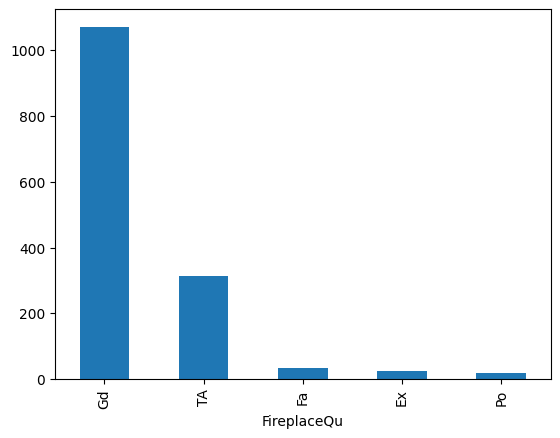

In [32]:
df['FireplaceQu'].value_counts().plot(kind='bar')

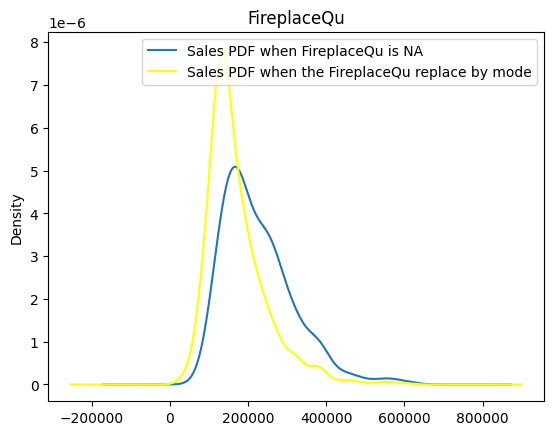

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

# dsitributattion after imputation

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax, color='yellow')

lines,labels = ax.get_legend_handles_labels()
labels = ['Sales PDF when FireplaceQu is NA', 'Sales PDF when the FireplaceQu replace by mode']
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')
plt.show()

## Note:
    1. Hence Frequency(Mode) imputation should not be applied on FireplaceQu.
    2. We also saw none of the category was clearly dominating for this column.
    3. Also the amount of missing avlue is higher than 5% or 10%.

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_tarin,Y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2,random_state=42)

In [36]:
from sklearn.impute import SimpleImputer

In [37]:
imputer = SimpleImputer(strategy='most_frequent')

In [38]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

/home/jatin/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [39]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)